$$
\begin{aligned}
\quad \Delta u + k^2 u= 0, \quad \text{in} \quad \mathbb{R}^2 \Rightarrow\\
\frac{\partial}{\partial x}(\frac{e_y}{e_x} \frac{\partial u}{\partial x})+
\frac{\partial}{\partial x}(\frac{e_y}{e_x} \frac{\partial u}{\partial x}) + e_x e_y k^2u=0\\
e_x = 1-i\frac{\sigma_x}{\omega},e_y = 1-i\frac{\sigma_y}{\omega}\\
\sigma_x:= \begin{cases}2 \pi a_0 f_0\left(\frac{l_\pi}{L_{P M L}}\right)^2, & \text { inside PML } \\ 0, & \text { outside PML }\end{cases}
\end{aligned}
$$

$$\text{Summerfield Radition Condition:} \lim_{r\rightarrow \infty} \frac{1}{\sqrt{r}} (\frac{\partial u}{\partial r}-iku) = 0$$

$$
\begin{aligned}
\Delta G(x,x_s) + k^2 G(x,x_s) = \delta(x - x_s) \quad \text{in} \quad \mathbb{R}^2\\
G(x,x_s) = \frac{i}{4} H_0^{(1)}(k|x-x_s|)\\
\Delta u(x) + k^2u(x) =f(x) = \int_\Omega \delta(x-x_s) f(x_s) dx_s \\
=\int_\Omega (\Delta G(x,x_s) + k^2G(x,x_s)) f(x_s) dx_s\\
\Rightarrow u(x) = \int_\Omega G(x,x_s) f(x_s) dx_s
\end{aligned}
$$  

CPU times: user 6.15 ms, sys: 3.51 ms, total: 9.67 ms
Wall time: 9.69 ms
CPU times: user 3.06 s, sys: 3.31 s, total: 6.36 s
Wall time: 6.41 s
CPU times: user 666 ms, sys: 1.86 ms, total: 668 ms
Wall time: 668 ms


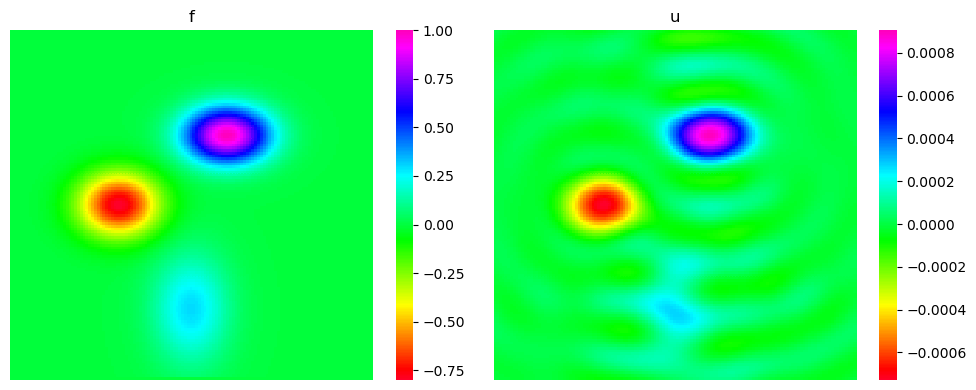

In [1]:
from scipy.special import hankel1 as hk
from Solver import *
from q_method import *
N = 128
k = 40
l = np.linspace(0,1,N+1)
X_ABS, Y_ABS = np.meshgrid(l, l, indexing='ij')
%time HANKEL_BENCHMARK = 1j/4*hk(0,k*np.sqrt(X_ABS**2+Y_ABS**2))
l1 = np.arange(N+1)
X1, Y1, X2, Y2 = np.meshgrid(l1, l1, l1, l1, indexing='ij')
%time G = HANKEL_BENCHMARK[np.abs(X1-X2),np.abs(Y1-Y2)]
G[np.isnan(G)] = 0. + 1j*0.
Matrix_Integral = 0.5*np.ones((N+1,N+1))
Matrix_Integral[1:-1,1:-1] = 1.
Matrix_Integral[0,0] = Matrix_Integral[-1,0] = Matrix_Integral[0,-1] = Matrix_Integral[-1,-1] = 0.25
Matrix_Integral /= N * N
f = q_gen(N,'MG')
%time u = -np.einsum('ijkl,kl->ij', G, f*Matrix_Integral)
heatmap_for_test(f,u.real,label_list=['f','u'],loss=False)

In [2]:
def A(u):
    ans = u[:-2,1:-1] + u[2:,1:-1] + u[1:-1,2:] + u[1:-1,:-2] - 4*u[1:-1,1:-1]
    return ans
def B(u):
    ans = u[:-2,:-2] + u[2:,2:] + u[:-2,2:] + u[2:,:-2] - 4*u[1:-1,1:-1]
    return ans

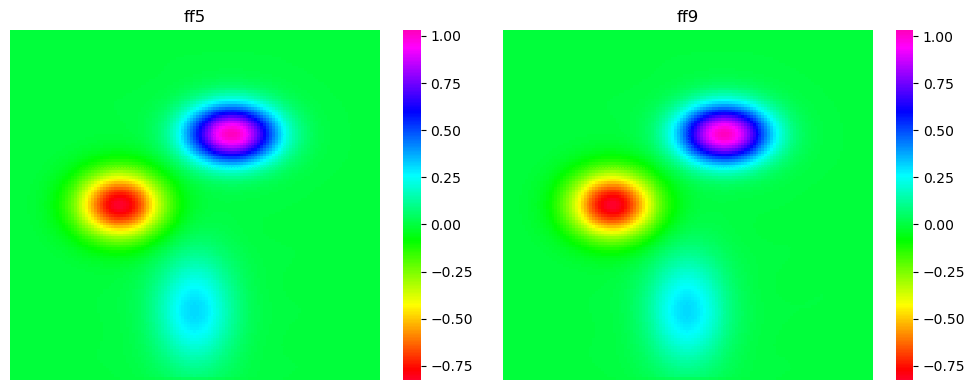

In [3]:
ff5 = A(u)*N*N + k*k*u[1:-1,1:-1]
ff9 = (A(u)*2/3 + B(u)/6)*N*N + k*k*u[1:-1,1:-1]
heatmap_for_test(ff5.real,ff9.real,label_list=['ff5','ff9'],loss=False)

CPU times: user 161 ms, sys: 8.14 ms, total: 169 ms
Wall time: 168 ms
CPU times: user 5.69 s, sys: 171 ms, total: 5.86 s
Wall time: 195 ms
CPU times: user 2.59 s, sys: 95.7 ms, total: 2.69 s
Wall time: 84 ms
相对误差为3.98%


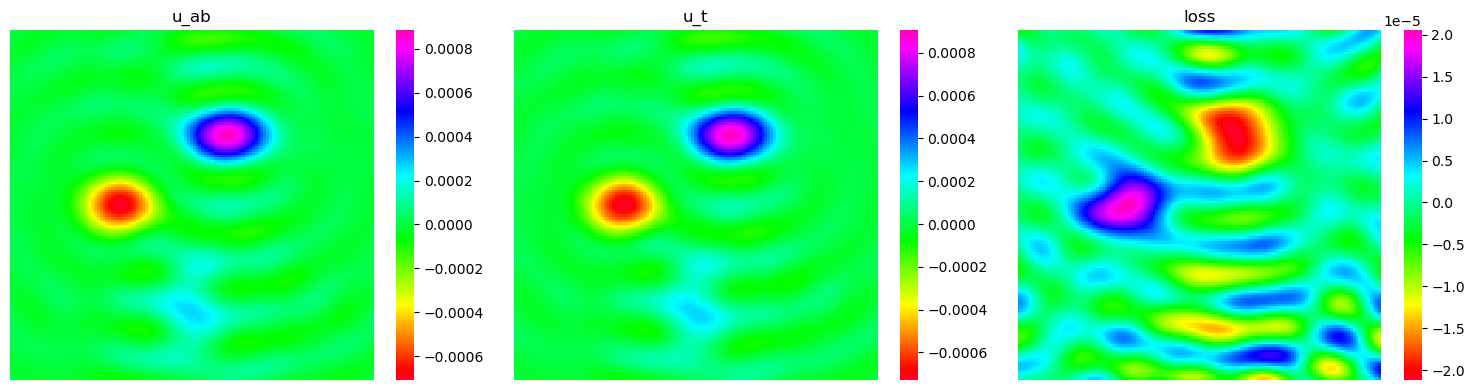

In [5]:
times = 1
%time Matrix_analysis(N,expand_times=times)
%time Matrix_factorize(N, k,expand_times=times)
%time U = Matrix_solve(f.reshape(-1,),expand_times=times).reshape(N+1,N+1)
heatmap_for_test(U.real,u.real,label_list=['u_ab','u_t','loss'],loss=True)

In [ ]:
fff5 = A(U1)*N*N + k*k*U1[1:-1,1:-1]
fff9 = (A(U1)*2/3 + B(U1)/6)*N*N + k*k*U1[1:-1,1:-1]
heatmap_for_test(fff5.real,fff9.real,label_list=['fff5','fff9'],loss=False)

$$
\begin{aligned}
\quad \Delta u + k^2 u(1+q) = f, \quad \text{in} \quad \mathbb{R}^2 \Rightarrow\\
\frac{\partial}{\partial x}(\frac{e_y}{e_x} \frac{\partial u}{\partial x})+
\frac{\partial}{\partial x}(\frac{e_y}{e_x} \frac{\partial u}{\partial x}) + e_x e_y k^2u(1+q)=f\\
e_x = 1-i\frac{\sigma_x}{\omega},e_y = 1-i\frac{\sigma_y}{\omega}
\end{aligned}
$$